In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

import quantstats


In [39]:
df_price = pd.read_excel('data/data_tmp.xlsx', sheet_name="收盘价")
df_price

,代码,2016-12-30 00:00:00,2017-01-26 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,...,2021-02-26 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-30 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-29 00:00:00,2021-11-30 00:00:00
0,000001.SZ,9.10,9.33,9.48,9.17,8.99,9.20,9.39,10.67,11.28,...,21.38,22.01,23.29,24.20,22.62,17.69,17.80,17.93,19.50,17.44
1,000002.SZ,20.55,20.68,20.53,20.58,19.50,21.26,24.97,23.37,23.23,...,33.10,30.00,28.17,26.70,23.81,20.66,19.80,21.31,18.21,18.26
2,000063.SZ,15.95,15.15,15.80,16.96,17.76,19.53,23.74,22.95,23.86,...,31.76,29.32,28.95,31.44,33.23,38.80,33.20,33.13,32.62,30.68
3,000066.SZ,12.44,9.14,10.95,10.10,9.66,8.34,9.01,9.30,8.41,...,17.27,14.86,11.81,15.28,14.60,15.95,14.69,13.19,13.45,14.06
4,000069.SZ,6.95,6.95,7.50,7.30,8.15,8.82,10.06,9.20,8.70,...,8.08,10.19,9.31,8.34,7.44,6.45,6.74,7.49,6.26,5.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,688363.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,186.07,160.50,154.20,208.50,269.10,277.86,229.01,180.78,185.82,166.00
296,688396.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.09,60.81,55.81,63.50,62.20,91.02,100.00,75.40,68.85,61.78
297,688561.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114.99,104.12,88.58,92.91,92.30,92.31,92.46,89.99,81.93,91.51
298,688599.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.58,20.19,18.55,16.53,18.39,28.35,46.69,60.54,53.56,78.30


In [46]:
df_size = pd.read_excel('data/data_tmp.xlsx', sheet_name="总市值")
df_size

,代码,2016-12-30 00:00:00,2017-01-26 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,000001.SZ,1562.507434,1601.999380,1627.754997,1574.526722,1543.619982,1579.677846,1612.301627,1832.082893,1936.822402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000002.SZ,2268.545736,2282.896634,2266.337906,2271.857482,2152.634640,2346.923715,2756.476255,2579.849823,2564.395010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000063.SZ,667.120695,633.660096,661.345689,709.928116,743.415291,817.567897,994.457178,961.608335,999.814654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000066.SZ,164.655079,269.087949,322.375606,297.351015,284.397110,245.535393,265.260658,273.798460,247.596242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000069.SZ,570.294858,570.294858,615.426106,599.014743,668.763035,723.741101,825.491550,754.922690,713.894283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,688363.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,688396.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,688561.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,688599.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_price = df_price.set_index('代码')
df_size = df_size.set_index('代码')

$市值因子 = ln(股票总市值)$

In [48]:
df_size = df_size.T

In [49]:
df_size

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,1562.507434,2268.545736,667.120695,164.655079,570.294858,403.051497,347.951604,1253.537857,65.175650,1817.183253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,1601.999380,2282.896634,633.660096,269.087949,570.294858,425.036125,348.718017,1265.571821,61.277293,1928.781657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,1627.754997,2266.337906,661.345689,322.375606,615.426106,444.578015,370.944001,1285.628427,63.226471,2055.216842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,1574.526722,2271.857482,709.928116,297.351015,599.014743,431.142965,366.345522,1243.509555,62.130059,2150.769347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,1543.619982,2152.634640,743.415291,284.397110,668.763035,428.700229,344.119538,1185.345398,62.130059,2174.020908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


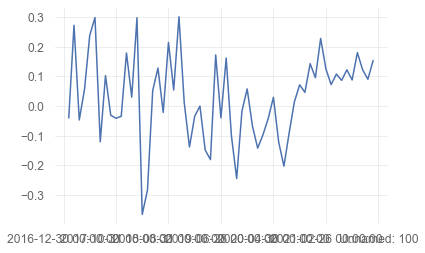

In [26]:
IC = ret_rk.T.corrwith(factor_rk.T)
IC.plot()

In [10]:
df_lnsize = np.log(df_size)

In [11]:
df_price = df_price.T
# 计算收益
ret = df_price.pct_change()
df_price

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,9.10,20.55,15.95,12.44,6.95,3.30,4.54,6.25,5.35,28.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,9.33,20.68,15.15,9.14,6.95,3.48,4.55,6.31,5.03,29.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,9.48,20.53,15.80,10.95,7.50,3.64,4.84,6.41,5.19,31.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,9.17,20.58,16.96,10.10,7.30,3.53,4.78,6.20,5.10,33.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,8.99,19.50,17.76,9.66,8.15,3.51,4.49,5.91,5.10,33.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31 00:00:00,9.20,21.26,19.53,8.34,8.82,3.51,4.39,5.70,5.10,36.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30 00:00:00,9.39,24.97,23.74,9.01,10.06,3.43,4.49,5.60,5.05,43.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31 00:00:00,10.67,23.37,22.95,9.30,9.20,3.67,4.79,5.91,5.05,41.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31 00:00:00,11.28,23.23,23.86,8.41,8.70,3.57,4.59,6.08,5.05,41.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 00:00:00,11.11,26.25,28.30,8.61,8.17,3.56,4.48,5.83,5.05,44.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ret

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,0.025275,0.006326,-0.050157,-0.265273,0.000000,0.054545,0.002203,0.009600,-0.059813,0.061413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,0.016077,-0.007253,0.042904,0.198031,0.079137,0.045977,0.063736,0.015848,0.031809,0.065552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,-0.032700,0.002435,0.073418,-0.077626,-0.026667,-0.030220,-0.012397,-0.032761,-0.017341,0.045198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,-0.019629,-0.052478,0.047170,-0.043564,0.116438,-0.005666,-0.060669,-0.046774,0.000000,0.010811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31 00:00:00,0.023359,0.090256,0.099662,-0.136646,0.082209,0.000000,-0.022272,-0.035533,0.000000,0.073084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30 00:00:00,0.020652,0.174506,0.215566,0.080336,0.140590,-0.022792,0.022779,-0.017544,-0.009804,0.191584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31 00:00:00,0.136315,-0.064077,-0.033277,0.032186,-0.085487,0.069971,0.066815,0.055357,0.000000,-0.042751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31 00:00:00,0.057170,-0.005991,0.039651,-0.095699,-0.054348,-0.027248,-0.041754,0.028765,0.000000,-0.004854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 00:00:00,-0.015071,0.130004,0.186085,0.023781,-0.060920,-0.002801,-0.023965,-0.041118,0.000000,0.077805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_lnsize = df_lnsize.T
df_lnsize

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,7.354047,7.726894,6.502971,5.103853,6.346154,5.999064,5.852063,7.133725,4.177086,7.505043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,7.379008,7.733200,6.451513,5.595038,6.346154,6.052174,5.854264,7.143279,4.115409,7.564644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,7.394957,7.725921,6.494277,5.775717,6.422315,6.097126,5.916051,7.159003,4.146723,7.628137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,7.361710,7.728353,6.565164,5.694913,6.395286,6.066440,5.903577,7.125693,4.129230,7.673581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,7.341886,7.674448,6.611255,5.650372,6.505430,6.060758,5.840989,7.077789,4.129230,7.684334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
factor = df_lnsize.copy()
factor_rk = factor.rank(pct=True, axis=1)
factor_rk

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,0.876596,0.906383,0.655319,0.153191,0.582979,0.468085,0.408511,0.804255,0.017021,0.889362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,0.869748,0.907563,0.613445,0.319328,0.584034,0.483193,0.407563,0.806723,0.021008,0.894958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,0.861925,0.903766,0.627615,0.368201,0.594142,0.481172,0.410042,0.794979,0.016736,0.895397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,0.855372,0.904959,0.648760,0.330579,0.586777,0.462810,0.409091,0.793388,0.016529,0.900826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,0.851240,0.900826,0.673554,0.326446,0.619835,0.471074,0.388430,0.768595,0.020661,0.904959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ret_rk = ret.rank(pct=True, axis=1)
ret_rk

代码,000001.SZ,000002.SZ,000063.SZ,000066.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000301.SZ,000333.SZ,...,688012.SH,688036.SH,688111.SH,688126.SH,688169.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
2016-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26 00:00:00,0.812766,0.765957,0.417021,0.008511,0.740426,0.885106,0.761702,0.782979,0.357447,0.910638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 00:00:00,0.391489,0.204255,0.621277,0.978723,0.842553,0.655319,0.740426,0.387234,0.553191,0.757447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31 00:00:00,0.134454,0.378151,0.794118,0.029412,0.151261,0.138655,0.214286,0.130252,0.189076,0.672269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28 00:00:00,0.435146,0.221757,0.778243,0.280335,0.920502,0.514644,0.184100,0.242678,0.573222,0.648536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31 00:00:00,0.727273,0.958678,0.966942,0.066116,0.925620,0.572314,0.433884,0.351240,0.572314,0.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30 00:00:00,0.500000,0.946281,0.975207,0.776860,0.913223,0.297521,0.504132,0.330579,0.342975,0.966942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31 00:00:00,0.893004,0.131687,0.201646,0.580247,0.098765,0.728395,0.716049,0.658436,0.376543,0.168724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31 00:00:00,0.717213,0.360656,0.614754,0.090164,0.188525,0.299180,0.229508,0.569672,0.424180,0.364754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 00:00:00,0.283401,0.866397,0.935223,0.522267,0.052632,0.364372,0.202429,0.109312,0.408907,0.761134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可以发现，大部分时候，市值因子的IC都在0以上

In [42]:
# 根据市值因子的大小进行分组
factor_rk2 = factor_rk.stack().reset_index()
factor_rk2.columns = ['date','cd','sizerk']
factor_rk2['分组'] = factor_rk2['sizerk'].apply(lambda x: 5 if x>=0.8 else 4 if x>=0.6 else 3 if x>=0.3 else 2 if x>=0.2 else 1)
factor_rk2 = factor_rk2.dropna()
factor_rk2

,date,cd,sizerk,分组
0,2016-12-30,000001.SZ,0.876596,5
1,2016-12-30,000002.SZ,0.906383,5
2,2016-12-30,000063.SZ,0.655319,4
3,2016-12-30,000066.SZ,0.153191,1
4,2016-12-30,000069.SZ,0.582979,3
...,...,...,...,...
16280,2021-11-30,688363.SH,0.366667,3
16281,2021-11-30,688396.SH,0.453333,3
16282,2021-11-30,688561.SH,0.290000,2
16283,2021-11-30,688599.SH,0.703333,4


In [51]:
df2 = df_size.stack().reset_index()
df2.columns = ['date', 'cd', 'size']
df2 = df2.dropna()
df2

,date,cd,size
0,2016-12-30,000001.SZ,1562.507434
1,2016-12-30,000002.SZ,2268.545736
2,2016-12-30,000063.SZ,667.120695
3,2016-12-30,000066.SZ,164.655079
4,2016-12-30,000069.SZ,570.294858
...,...,...,...
16280,2021-11-30,688363.SH,774.000000
16281,2021-11-30,688396.SH,944.921754
16282,2021-11-30,688561.SH,635.984653
16283,2021-11-30,688599.SH,1512.347688


In [52]:
df_m = pd.merge(factor_rk2, df2)
df_m

,date,cd,sizerk,分组,size
0,2016-12-30,000001.SZ,0.876596,5,1562.507434
1,2016-12-30,000002.SZ,0.906383,5,2268.545736
2,2016-12-30,000063.SZ,0.655319,4,667.120695
3,2016-12-30,000066.SZ,0.153191,1,164.655079
4,2016-12-30,000069.SZ,0.582979,3,570.294858
...,...,...,...,...,...
16280,2021-11-30,688363.SH,0.366667,3,774.000000
16281,2021-11-30,688396.SH,0.453333,3,944.921754
16282,2021-11-30,688561.SH,0.290000,2,635.984653
16283,2021-11-30,688599.SH,0.703333,4,1512.347688


In [55]:
g = df_m.groupby(['date', '分组'])['size'].sum()
g = g.reset_index()
g.columns = ['date', '分组', 'total_size']
df_m = pd.merge(df_m, g)
df_m

,date,cd,sizerk,分组,size,total_size
0,2016-12-30,000001.SZ,0.876596,5,1562.507434,168392.193725
1,2016-12-30,000002.SZ,0.906383,5,2268.545736,168392.193725
2,2016-12-30,000166.SZ,0.804255,5,1253.537857,168392.193725
3,2016-12-30,000333.SZ,0.889362,5,1817.183253,168392.193725
4,2016-12-30,000651.SZ,0.855319,5,1481.072942,168392.193725
...,...,...,...,...,...,...
16280,2021-11-30,603882.SH,0.203333,2,507.756483,16990.914284
16281,2021-11-30,603899.SH,0.216667,2,519.537530,16990.914284
16282,2021-11-30,688009.SH,0.210000,2,514.665203,16990.914284
16283,2021-11-30,688169.SH,0.240000,2,542.278140,16990.914284


In [57]:
df_m['W'] = df_m['size'] / df_m['total_size']

In [58]:
df3 = ret.stack().reset_index()
df3.columns = ['date','cd','return']
df3 = df3.dropna()
df3

,date,cd,return
0,2017-01-26,000001.SZ,0.025275
1,2017-01-26,000002.SZ,0.006326
2,2017-01-26,000063.SZ,-0.050157
3,2017-01-26,000066.SZ,-0.265273
4,2017-01-26,000069.SZ,0.000000
...,...,...,...
15915,2021-11-30,688363.SH,-0.106662
15916,2021-11-30,688396.SH,-0.102687
15917,2021-11-30,688561.SH,0.116929
15918,2021-11-30,688599.SH,0.461912


In [59]:
df_m1 = pd.merge(df_m, df3)
df_m1

,date,cd,sizerk,分组,size,total_size,W,return
0,2017-01-26,000001.SZ,0.869748,5,1601.999380,177166.325166,0.009042,0.025275
1,2017-01-26,000002.SZ,0.907563,5,2282.896634,177166.325166,0.012886,0.006326
2,2017-01-26,000166.SZ,0.806723,5,1265.571821,177166.325166,0.007143,0.009600
3,2017-01-26,000333.SZ,0.894958,5,1928.781657,177166.325166,0.010887,0.061413
4,2017-01-26,000651.SZ,0.865546,5,1550.855420,177166.325166,0.008754,0.047116
...,...,...,...,...,...,...,...,...
15915,2021-11-30,603882.SH,0.203333,2,507.756483,16990.914284,0.029884,0.117848
15916,2021-11-30,603899.SH,0.216667,2,519.537530,16990.914284,0.030577,-0.065902
15917,2021-11-30,688009.SH,0.210000,2,514.665203,16990.914284,0.030291,-0.044574
15918,2021-11-30,688169.SH,0.240000,2,542.278140,16990.914284,0.031916,0.273110


In [60]:
df_m1['w * return'] = df_m1['W'] * df_m1['return']

In [69]:
group_ret = df_m1.groupby(['date','分组'])['w * return'].sum() + 1.0 
group_ret = group_ret.reset_index()
group_ret

,date,分组,w * return
0,2017-01-26,1,0.980670
1,2017-01-26,2,0.997662
2,2017-01-26,3,0.953947
3,2017-01-26,4,0.955692
4,2017-01-26,5,0.976666
...,...,...,...
290,2021-11-30,1,0.966081
291,2021-11-30,2,0.988587
292,2021-11-30,3,1.000866
293,2021-11-30,4,1.017206


In [70]:
group_ret = group_ret.pivot('date', '分组', 'w * return').mean()
group_ret

分组
1    1.009812
2    1.015103
3    1.018183
4    1.017843
5    1.013388
dtype: float64

发现收益率和分组之间的关系有点微妙..可能是哪里写错了